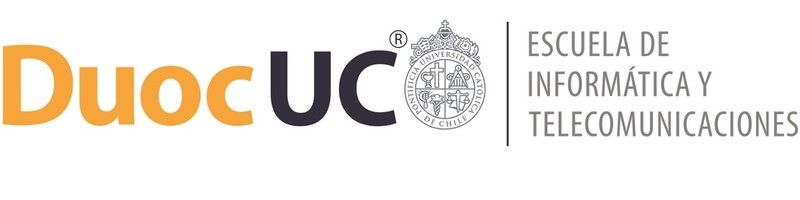


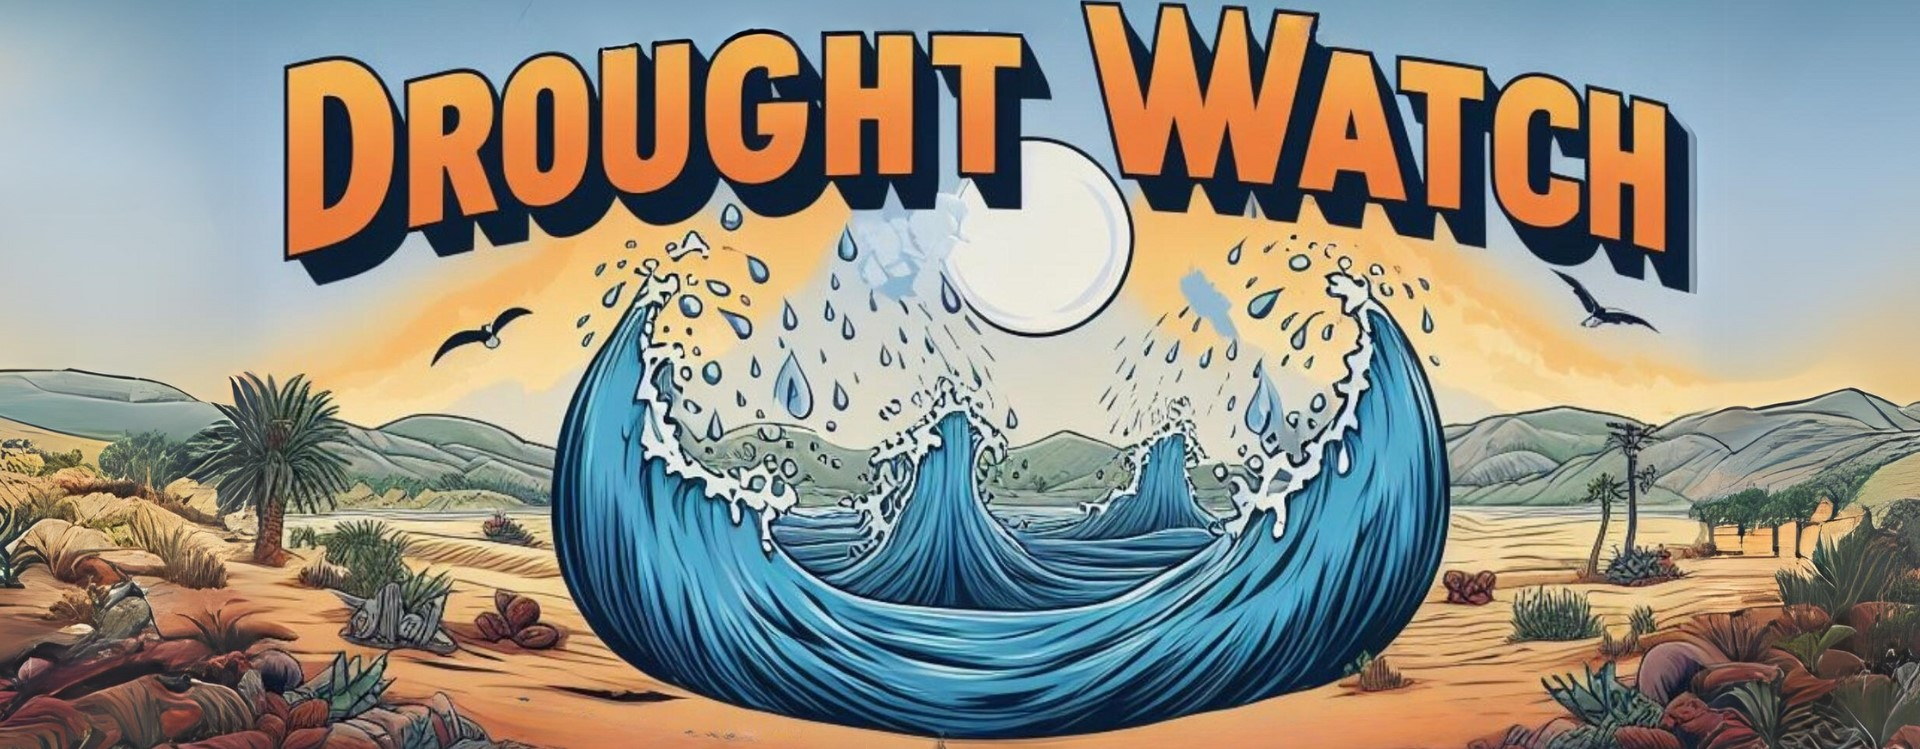



---



# Informe Técnico "Drought Watch"

Integrantes:
* Juan Muñoz
* Javier Jorquera

Docente:
* Francia Berna

Sección: **BIY7121 -001D**

# Caso Mineria de datos

CONTEXTO CASO

El caso se centra en Australia, un país extenso con diversos climas que van desde desérticos y semiáridos en el oeste hasta tropicales en el norte y templados en el sureste y suroeste . Australia se divide en seis estados y dos territorios continentales, con ciudades importantes como Sídney, Melbourne, Brisbane, Perth y Adelaide . El país tiene una gran diversidad climática, con inviernos suaves y veranos cálidos, y experimenta fenómenos naturales extremos como sequías, inundaciones, ciclones tropicales e incendios forestales . En cuanto a recursos naturales y minería, Australia es uno de los principales productores y exportadores mundiales de minerales y productos energéticos, con el sector minero representando alrededor del 10% del PIB .

Además, se proporciona un conjunto de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia para que los estudiantes exploren y apliquen técnicas de minería de datos. Este conjunto de datos incluye variables como la temperatura mínima y máxima, la cantidad de lluvia registrada, la evaporación, las horas de sol, la dirección y velocidad del viento, entre otros.

En este caso, la data corresponde a un archivo CSV con 142.193 filas, cada una correspondiente a un dato en especifico sobre el tiempo. El archivo contiene 24 columnas correspondientes a variables que describen los datos meteorologicos.



---



# Fase 1: Business Understanding

## Objetivo


El objetivo de la Empresa "Drought Watch" es minimizar, prevenir y mitigar el impacto de las sequías en la agricultura australiana mediante la predicción temprana y precisa de las sequías.

## KPIs

* Tiempo de anticipación antes de una alerta: Determinar el tiempo promedio con el que el modelo puede predecir una sequía antes de que ocurra, lo que permitiría tomar medidas preventivas.

* Cobertura geográfica: Medir el porcentaje de regiones o ubicaciones en Australia donde el modelo puede realizar  las alertas de sequía con anticipación.

* Tendencia de Temperatura: Calculo de la media anual a lo largo del tiempo. para así con datos historicos comparar y medir una posible sequía según una referencia pasada.

* Reducción en Pérdida de Cosechas: Porcentaje de reducción en pérdida de cosechas en áreas donde se implementaron medidas preventivas basadas en las alertas.

---


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline {Ubicación} & \text {Ubicación de la estación meteorológica.}  \\
\hline \text{ MinTemp} & \text { Temperatura mínima en grados Celsius.} \\
\hline \text{ MaxTemp} & \text { temperatura máxima en grados Celsius.} \\
\hline \text{ Lluvia} & \text { Cantidad de lluvia registrada ese día en mm.} \\
\hline \text{ Evaporacion} & \text { Evaporación (mm) en 24 horas.} \\
\hline \text{ Sol} & \text { Número de horas de sol brillante en el día.} \\
\hline \text{ DirRafaga:} & \text { Dirección de la ráfaga de viento más fuerte en 24 horas.} \\
\hline \text{ VelRafaga} & \text { Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.} \\
\hline \text{ Dir9am} & \text { Dirección del viento a las 9am.} \\
\hline \text{ Dir3pm} & \text { Dirección del viento a las 3pm.} \\
\hline \text{ Vel9am} & \text { Velocidad (km/hr) del viento a las 9am.} \\
\hline \text{ Vel3pm} & \text { Velocidad (km/hr) del viento a las 3pm.} \\
\hline \text{ Hum9am} & \text { Porcentaje de humedad a las 9am.} \\
\hline \text{ Hum3pm} & \text { Porcentaje de humedad a las 3pm.} \\
\hline \text{ Pres9am} & \text { Presión atmosférica (hpa) a nivel del mar a las 9am.} \\
\hline \text{ Pre3pm} & \text { Presión atmosférica (hpa) a nivel del mar a las 3pm.} \\
\hline \text{ Nub9am} & \text { Fración del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.} \\
\hline \text{  Nub3pm} & \text {Fración del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.} \\
\hline \text{ Temp9am} & \text { Temperatura en grados celsius a las 9am.} \\
\\
\hline \text{ Temp3pm} & \text { Temperatura en grados celsius a las 3pm.} \\
\\
\hline \text{ LluviaHoy} & \text { Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no.} \\\\
\hline \text{ RISK_MM} & \text { La cantidad de lluvia. Una especie de medida del "riesgo".} \\\\
\hline \text{ LluviaMan} & \text { Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.} \\
\end{array}
\end{aligned}
$$


---



## ¿Para qué necesitamos estos datos?


Se utilizarán estos datos para medir los niveles de temperatura, humedad, presión atmosférica y los días de lluvia, para así crear modelos y poder predecir una sequía en un tiempo determinado, se separán los datos por año, para así verificar patrones repetitivos.

Datos de interés:


* MinTemp y MaxTemp: Las temperaturas extremas, tanto mínimas como máximas, pueden influir en la evaporación y la sequedad del suelo, lo que contribuye a las condiciones de sequía.

* Temp9am y Temp3pm: Estas variables pueden proporcionar información adicional sobre los patrones de temperatura diarios, que también pueden estar relacionados con las condiciones de sequía.

* RainTomorrow: Esta es probablemente la variable objetivo principal, ya que indica si habrá o no precipitaciones al día siguiente. Predecir correctamente los días sin lluvia puede ser clave para anticipar las sequías.




## Datos requeridos para nuestro análisis

*   Rain Today/Tomorrow
*   Evaporation
*   Location
*   Date
*   Max/Min Temp
*   Humidity 9am/3pm
*   Temp 9am/3pm
*   Rainfall   
   




---



# Fase 2: Data Understanding

## Datos historicos de las temperaturas de australia según la web

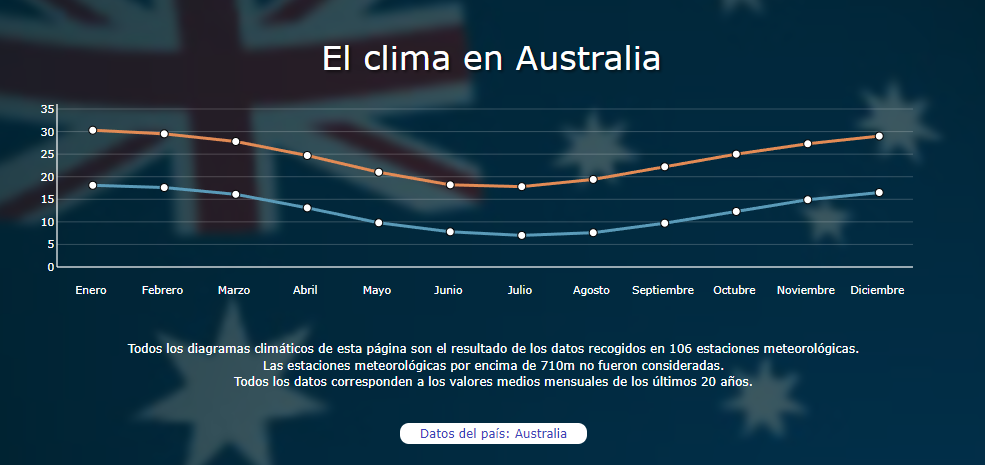

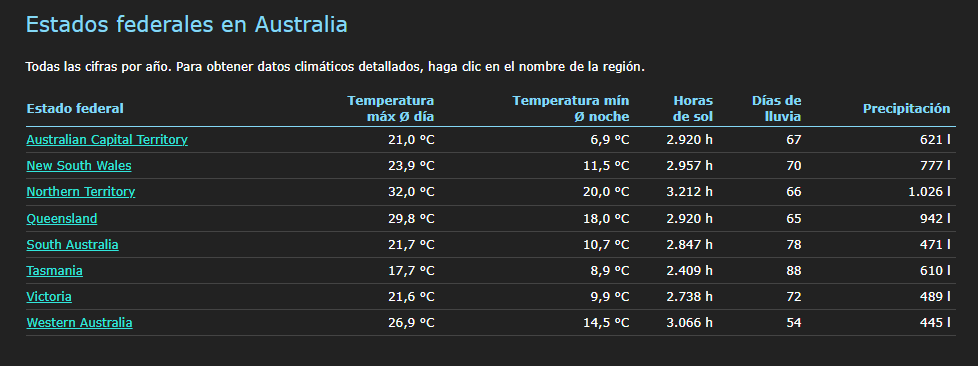

Fuente: https://www.datosmundial.com/oceania/australia/clima.php

## Montaje y carga de librerías

In [ ]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
import folium
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from folium.plugins import HeatMap
from datetime import datetime
from scipy import stats



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## Desglose de los datos

A continuación importaremos el la base de datos y mostraremos las 3 primeras columnas con los datos

Siguiendo el código veremos primero la cantidad total de datos que este contiene además aplicaremos un “.info” para saber qué tipo de datos tiene cada columna

In [ ]:
path= "/content/drive/MyDrive/Séptimo semestre/Minería de datos/Proyecto semestral/csv/weatherAUS.csv"
dw=pd.read_csv(path, sep=',')
#dw.head(5)

---

Existen 142193 filas y 24 columnas con datos.



In [ ]:
dw.shape

(142193, 24)

In [ ]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

---

## Análisis de datos númericos

Ocuparemos el siguiente código para obtener el análisis de datos de los datos numéricos de la base de datos este contiene el conteo, el promedio, la desviación estándar, el mínimo, distintos percentiles y el máximo

In [ ]:
dw.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


### Descripción "Date"

Identificamos la cantidad de años que hay en el dataset con fecha de inicio '01-11-2007' y fin '25-16-2017'



In [ ]:
# Asegurándonos de que 'Date' está en formato datetime
dw['Date'] = pd.to_datetime(dw['Date'])
# Encontrando la fecha mínima y máxima en el DataFrame
min_date = dw['Date'].min()
max_date = dw['Date'].max()
print('Primera fecha', min_date,'Última fecha:', max_date)

# Fechas
start_date = datetime(2007, 11, 1)
end_date = datetime(2017, 6, 25)
# Calculo
difference = end_date - start_date
years = difference.days / 365.25
print('Años:', years)


Primera fecha 2007-11-01 00:00:00 Última fecha: 2017-06-25 00:00:00
Años: 9.648186173853524


---

### Temperatura máxima registrada en el dataset

In [ ]:
# Encontrar la fila con la temperatura máxima
max_temp_row = dw.loc[dw['MaxTemp'].idxmax()]

print(f"La temperatura máxima registrada es: {max_temp_row['MaxTemp']}°C")
print(f"Ubicación: {max_temp_row['Location']}")
print(f"Fecha: {max_temp_row['Date']}")


La temperatura máxima registrada es: 48.1°C
Ubicación: Woomera
Fecha: 2011-01-25 00:00:00


###La máxima temperatura mínima

In [ ]:
# valor máximo de 'MinTemp'
max_min_temp_idx = dw['MinTemp'].idxmax()

# Acceder a la fila correspondiente para obtener la temperatura, fecha y ubicación
max_min_temp_row = dw.loc[max_min_temp_idx]

print(f"La máxima temperatura mínima registrada fue de {max_min_temp_row['MinTemp']}°C")
print(f"Ubicación: {max_min_temp_row['Location']}")
print(f"Fecha: {max_min_temp_row['Date']}")


La máxima temperatura mínima registrada fue de 33.9°C
Ubicación: Adelaide
Fecha: 2009-01-29 00:00:00


---

### Distribución de Temperaturas

Para entender cómo varían las temperaturas, calculamos estadísticas descriptivas para "MaxTemp" y "MinTemp".

In [ ]:
print(dw[['MaxTemp', 'MinTemp']].describe())

             MaxTemp        MinTemp
count  141871.000000  141556.000000
mean       23.226784      12.186400
std         7.117618       6.403283
min        -4.800000      -8.500000
25%        17.900000       7.600000
50%        22.600000      12.000000
75%        28.200000      16.800000
max        48.100000      33.900000


Podemos ver que en la máxima temperatura de la mínima temperatura es de 33.9°C, por lo que consideramos que podria ser un valor átipico que quizás mas adelante deberamos eliminar

### Análisis de Precipitaciones Sidney

A continuación analizaremos el promedio mensual y anual de las precipitaciones (Rainfall) el cual nos ayuda a identificar patrones o meses con baja o alta precipitación.

<ipython-input-12-a2268a4289ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = pd.to_datetime(city_data['Date'])


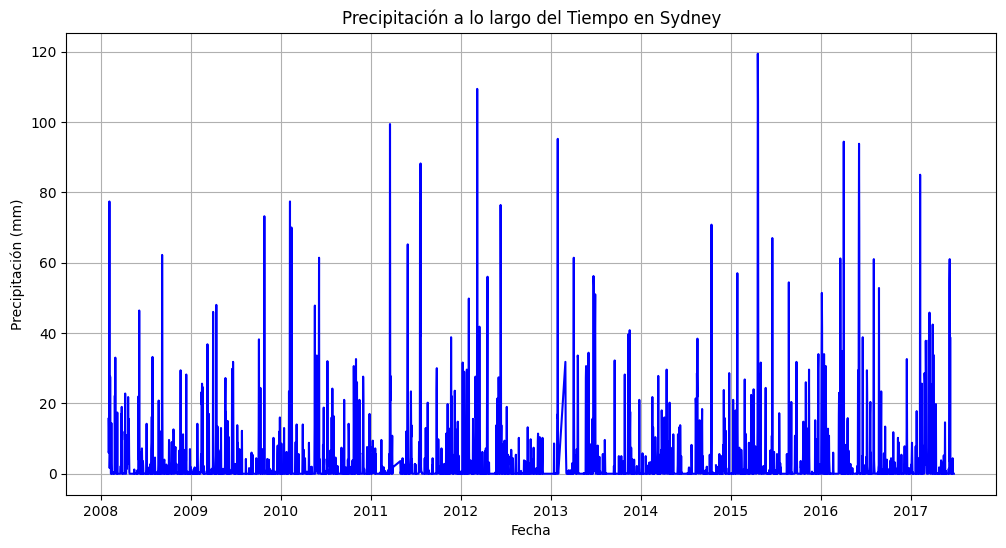

In [ ]:
# Filtrar datos para una ciudad específica
city_data = dw[dw['Location'] == 'Sydney']

# Convertir la columna Date a formato de fecha
city_data['Date'] = pd.to_datetime(city_data['Date'])

# Gráfico de Líneas de Precipitación a lo largo del Tiempo
plt.figure(figsize=(12, 6))
plt.plot(city_data['Date'], city_data['Rainfall'], color='blue')
plt.title('Precipitación a lo largo del Tiempo en Sydney')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()


Este gráfico de líneas muestra cómo las precipitaciones cambian año a año , permitiendo observar los años  más secos y patrones que pueden ser indicativos de riesgo de sequía. Como se puede observar en octubre entre los años 2012 y 2015 en octubre están las precipitaciones más altas en Sidney

---


<ipython-input-13-0dfc6fc9a19f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dw, x='Month', y='MinTemp', label='MinTemp', ci=None)
<ipython-input-13-0dfc6fc9a19f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dw, x='Month', y='MaxTemp', label='MaxTemp', ci=None)


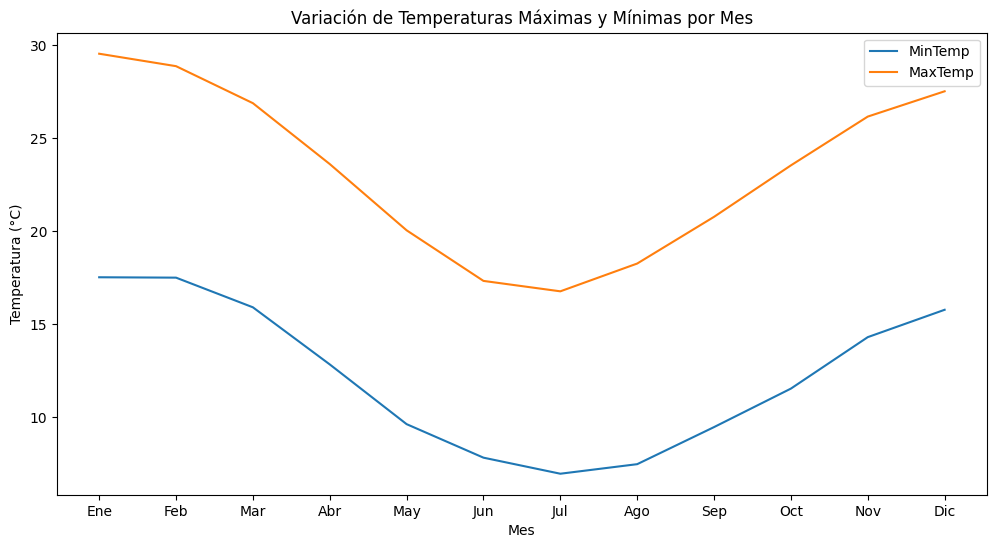

In [ ]:
# Suponiendo que 'Date' y 'MinTemp'/'MaxTemp' están en el formato correcto
dw['Month'] = dw['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(data=dw, x='Month', y='MinTemp', label='MinTemp', ci=None)
sns.lineplot(data=dw, x='Month', y='MaxTemp', label='MaxTemp', ci=None)
plt.title('Variación de Temperaturas Máximas y Mínimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()


Se puede visualizar que en temporadas de invierno (mayo- agosto) se registraron la temperaturas más bajas del dataset.

###Análisis de Evaporación y Humedad

Examinaremos la evaporación y humedad el cual puede ofrecer insights sobre la pérdida de agua y las condiciones de humedad.

In [ ]:
print(dw[['Evaporation', 'Humidity9am']].describe())


        Evaporation    Humidity9am
count  81350.000000  140419.000000
mean       5.469824      68.843810
std        4.188537      19.051293
min        0.000000       0.000000
25%        2.600000      57.000000
50%        4.800000      70.000000
75%        7.400000      83.000000
max      145.000000     100.000000


### Relación entre Evaporación y Humedad a las 9am en Días Sin Lluvia

A continuación visualizaremos la relación entre la evaporación y la humedad en días sin lluvia para identificar condiciones que pueden predisponer a una sequía.

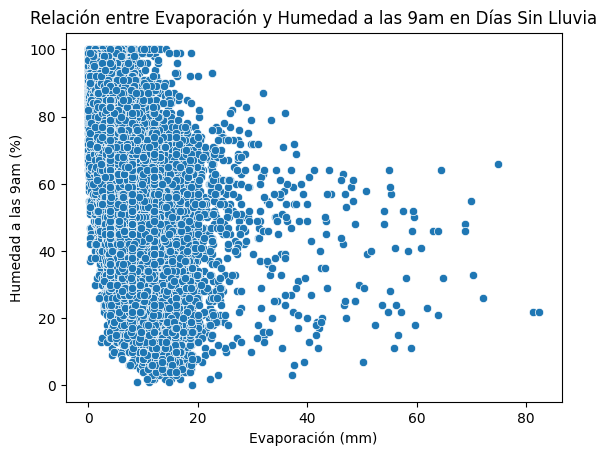

In [ ]:
sns.scatterplot(data=dw[dw['RainToday'] == 'No'], x='Evaporation', y='Humidity9am')
plt.title('Relación entre Evaporación y Humedad a las 9am en Días Sin Lluvia')
plt.xlabel('Evaporación (mm)')
plt.ylabel('Humedad a las 9am (%)')
plt.show()


Este grafico nos muestra que a  medida que disminuye la humedad a las 9 a.m, la evaporación tiende a aumentar. Hay una tendencia general a disminuir la evaporación a medida que aumenta la humedad a las 9 a.m., con algunas excepciones.
En conclusión, el gráfico sugiere que una humedad más alta a las 9 a. m. se asocia con tasas de evaporación más bajas, y una humedad más baja a las 9 a. m. se asocia con tasas de evaporación más altas.


---


###Identificación de Valores Atípicos

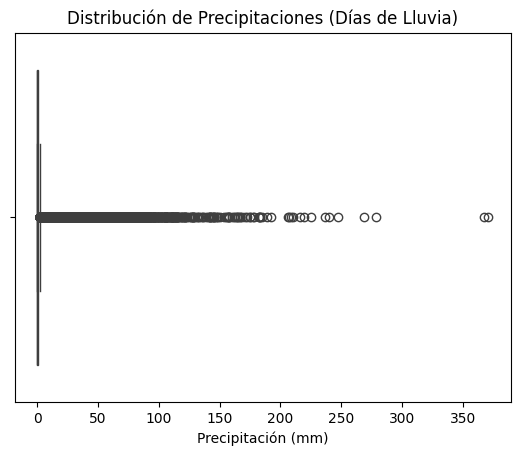

In [ ]:
sns.boxplot(data=dw, x='Rainfall')
plt.title('Distribución de Precipitaciones (Días de Lluvia)')
plt.xlabel('Precipitación (mm)')
plt.show()


Este gráfico permite identificar días con precipitaciones anormalmente altas, que podrían ser errores o eventos extremos (como ciclones) en donde consideraremos de manera diferente en el análisis.

### Variación temperatura en las ciudades de Australia

### Lista de ciudades en el dataset

In [ ]:
num_localidades = dw['Location'].nunique()
lista_ciudades = dw['Location'].unique().tolist()
print("Lista de",num_localidades , "ciudades:", lista_ciudades)


Lista de 49 ciudades: ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


### Creación de diccionario con las 49 ciudades con sus respectivas coordenadas

In [ ]:
ubicaciones_coords = {
    "Albury": (-36.0737, 146.9135),
    "BadgerysCreek": (-33.8761, 150.7442),
    "Cobar": (-31.4983, 145.8344),
    "CoffsHarbour": (-30.2963, 153.1157),
    "Moree": (-29.4658, 149.8409),
    "Newcastle": (-32.9267, 151.7789),
    "NorahHead": (-33.2817, 151.5679),
    "NorfolkIsland": (-29.0408, 167.9547),
    "Penrith": (-33.7511, 150.6942),
    "Richmond": (-33.5995, 150.7522),
    "Sydney": (-33.8688, 151.2093),
    "SydneyAirport": (-33.9399, 151.1753),
    "WaggaWagga": (-35.1082, 147.3598),
    "Williamtown": (-32.815, 151.8428),
    "Wollongong": (-34.4278, 150.8931),
    "Canberra": (-35.2809, 149.1300),
    "Tuggeranong": (-35.4228, 149.0888),
    "MountGinini": (-35.5294, 148.7723),
    "Ballarat": (-37.5622, 143.8503),
    "Bendigo": (-36.7570, 144.2794),
    "Sale": (-38.1118, 147.0624),
    "MelbourneAirport": (-37.6690, 144.8410),
    "Melbourne": (-37.8136, 144.9631),
    "Mildura": (-34.2080, 142.1246),
    "Nhil": (-36.3333, 141.6503),
    "Portland": (-38.3463, 141.6042),
    "Watsonia": (-37.7110, 145.0830),
    "Dartmoor": (-37.9225, 141.2760),
    "Brisbane": (-27.4698, 153.0251),
    "Cairns": (-16.9186, 145.7781),
    "GoldCoast": (-28.0167, 153.4000),
    "Townsville": (-19.2583, 146.8169),
    "Adelaide": (-34.9285, 138.6007),
    "MountGambier": (-37.8247, 140.7838),
    "Nuriootpa": (-34.4694, 138.9939),
    "Woomera": (-31.1999, 136.8253),
    "Albany": (-35.0275, 117.8835),
    "Witchcliffe": (-34.0268, 115.1000),
    "PearceRAAF": (-31.6678, 116.0150),
    "PerthAirport": (-31.9403, 115.9672),
    "Perth": (-31.9505, 115.8605),
    "SalmonGums": (-32.9815, 121.6438),
    "Walpole": (-34.9777, 116.7338),
    "Hobart": (-42.8821, 147.3272),
    "Launceston": (-41.4332, 147.1441),
    "AliceSprings": (-23.6980, 133.8807),
    "Darwin": (-12.4634, 130.8456),
    "Katherine": (-14.4646, 132.2635),
    "Uluru": (-25.3444, 131.0369),
}

### Mapa interactivo con las temperaturas promedio por ciudad dentro del conjunto de datos

In [ ]:
# Calculamos el promedio de temperatura para cada ciudad
dw['PromedioTemp'] = (dw['MaxTemp'] + dw['MinTemp']) / 2

# Agregamos las coordenadas desde tu diccionario de ubicaciones
dw['Latitud'] = dw['Location'].apply(lambda x: ubicaciones_coords[x][0])
dw['Longitud'] = dw['Location'].apply(lambda x: ubicaciones_coords[x][1])

# Calculamos el promedio de temperatura para cada ubicación
promedio_temp_ciudad = dw.groupby('Location', as_index=False)['PromedioTemp'].mean()
promedio_temp_ciudad['Latitud'] = promedio_temp_ciudad['Location'].apply(lambda x: ubicaciones_coords[x][0])
promedio_temp_ciudad['Longitud'] = promedio_temp_ciudad['Location'].apply(lambda x: ubicaciones_coords[x][1])


In [ ]:
import plotly.express as px

fig = px.scatter_geo(promedio_temp_ciudad,
                     lat='Latitud',
                     lon='Longitud',
                     size='PromedioTemp',  # El tamaño de la burbuja representa la temperatura promedio
                     color='PromedioTemp',  # El color también representa la temperatura
                     hover_name='Location',  # Muestra el nombre de la ciudad al pasar el cursor
                     projection='natural earth',  # Tipo de proyección del mapa
                     title='Temperaturas Promedio en Australia por Ciudad')

fig.show()


En este grafico podemos concluir  que en las localidades de Khaterine y Darwin contienen un mayor indice de temperaturas con un promedio de 27 grados en comparacion con otras localidades que no superan los 20 grados en promedio

Como se pueden ver en los dos gráficos, Darwin mantiene temperaturas muy altas en comparación a otras ciudades de la región.

### Matriz de correlación

En esta línea veremos la matriz de correlación para poder resumir los datos además de comprender la relación entre variables númericas y hacer una toma de decisiones.

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,Month,PromedioTemp,Latitud,Longitud
MinTemp,1.000000,0.734707,0.106710,-0.233009,0.008380,-0.458685,-0.468864,0.902217,0.707110,0.130864,0.084065,-0.205215,0.924196,0.511419,0.018650
MaxTemp,0.734707,1.000000,-0.113162,-0.503521,-0.504637,-0.340922,-0.436449,0.885665,0.984304,-0.069287,-0.158564,-0.165090,0.937603,0.465036,-0.084008
Rainfall,0.106710,-0.113162,1.000000,0.275666,0.308128,-0.194811,-0.138628,-0.008435,-0.119176,0.315966,0.287203,-0.021869,-0.008808,0.053300,0.027474
Humidity9am,-0.233009,-0.503521,0.275666,1.000000,0.665917,0.142010,0.190084,-0.468775,-0.498176,0.206567,0.257820,-0.089759,-0.401870,-0.197656,0.116799
Humidity3pm,0.008380,-0.504637,0.308128,0.665917,1.000000,-0.026133,0.054260,-0.215607,-0.554228,0.377051,0.446571,-0.017952,-0.277845,-0.073738,0.132692
Pressure9am,-0.458685,-0.340922,-0.194811,0.142010,-0.026133,1.000000,0.961478,-0.430731,-0.296056,-0.201402,-0.244516,0.038598,-0.426974,-0.138716,0.023739
Pressure3pm,-0.468864,-0.436449,-0.138628,0.190084,0.054260,0.961478,1.000000,-0.478576,-0.399183,-0.199941,-0.223520,0.028894,-0.485840,-0.211955,0.020155
Temp9am,0.902217,0.885665,-0.008435,-0.468775,-0.215607,-0.430731,-0.478576,1.000000,0.859091,0.043853,-0.025243,-0.137217,0.959774,0.560079,-0.047742
Temp3pm,0.707110,0.984304,-0.119176,-0.498176,-0.554228,-0.296056,-0.399183,0.859091,1.000000,-0.098810,-0.192531,-0.176394,0.915058,0.463761,-0.080537
RISK_MM,0.130864,-0.069287,0.315966,0.206567,0.377051,-0.201402,-0.199941,0.043853,-0.098810,1.000000,0.638084,-0.023859,0.028148,0.053033,0.027383


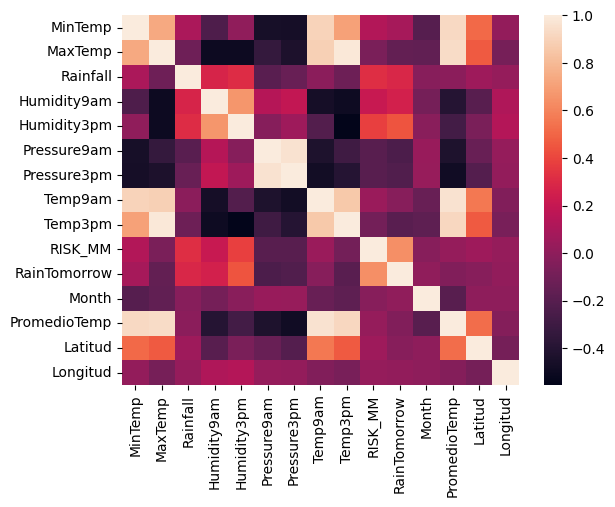

In [ ]:
corr = dwn.corr()
sns.heatmap(corr)
corr.style.background_gradient (cmap = 'RdYlGn')

---

# Fase 3: Data Preparation


##Limpieza datos relevantes




Crearemos un dataframe llamado "dwn" con las columas que nos sirven para la investigación

In [ ]:
dwn= dw.drop(['Sunshine','Evaporation','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Cloud9am', 'Cloud3pm',
              'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindDir9am', 'WindDir9am', 'WindDir9am','Date','Location',
              'RainToday', 'Humidity9am','Humidity3pm', 'Pressure9am','Pressure3pm','RISK_MM' ],axis=1)

### Codificación de Variables Categóricas

Conversión de las variables RainToday y 'RainTomorrow' que son categóricas ('Yes', 'No') a una forma numérica (1, 0).

In [ ]:
# Convertir 'RainTomorrow' de categórica a numérica
dwn['RainTomorrow'] = dwn['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
dwn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MinTemp       141556 non-null  float64
 1   MaxTemp       141871 non-null  float64
 2   Rainfall      140787 non-null  float64
 3   Temp9am       141289 non-null  float64
 4   Temp3pm       139467 non-null  float64
 5   RainTomorrow  142193 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 6.5 MB


In [ ]:
dwn.describe()

,MinTemp,MaxTemp,Rainfall,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,16.987509,21.687235,0.224181
std,6.403283,7.117618,8.465173,6.492838,6.937594,0.417043
min,-8.500000,-4.800000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,40.200000,46.700000,1.000000


---

### Cantidad de nulos por variable

In [ ]:
dwn.isna().sum()

MinTemp          637
MaxTemp          322
Rainfall        1406
Temp9am          904
Temp3pm         2726
RainTomorrow       0
dtype: int64

---

##Imputación en los nulos y valores perdidos

###KNN


In [ ]:
#Identificar y recortar outliers. Aquí un ejemplo simple con z-scores.
z_scores = np.abs(stats.zscore(dwn.select_dtypes(include=[np.number])))
dwn[(z_scores < 3).all(axis=1)]  # Mantener solo las filas sin ningún z-score extremo

# Alternativamente, podrías recortar o limitar los valores extremos antes de la imputación.
# Por ejemplo, limitar los valores en el 1er y 99º percentil
for col in dwn.select_dtypes(include=[np.number]).columns:
    lower = dwn[col].quantile(0.01)
    upper = dwn[col].quantile(0.99)
    dwn[col] = np.clip(dwn[col], lower, upper)


# Inicializar el KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Aplicar el imputer al dataframe
dwn_imputed = pd.DataFrame(imputer.fit_transform(dwn), columns=dwn.columns)

# Verificar los cambios en los datos
print(dwn_imputed.isnull().sum())

# Opcional: Verificar si todavía hay valores extremos
#print(dwn_imputed.describe())

MinTemp         0
MaxTemp         0
Rainfall        0
Temp9am         0
Temp3pm         0
RainTomorrow    0
dtype: int64


###Mapa de correlación con los datos imputados por metodo "KNN"

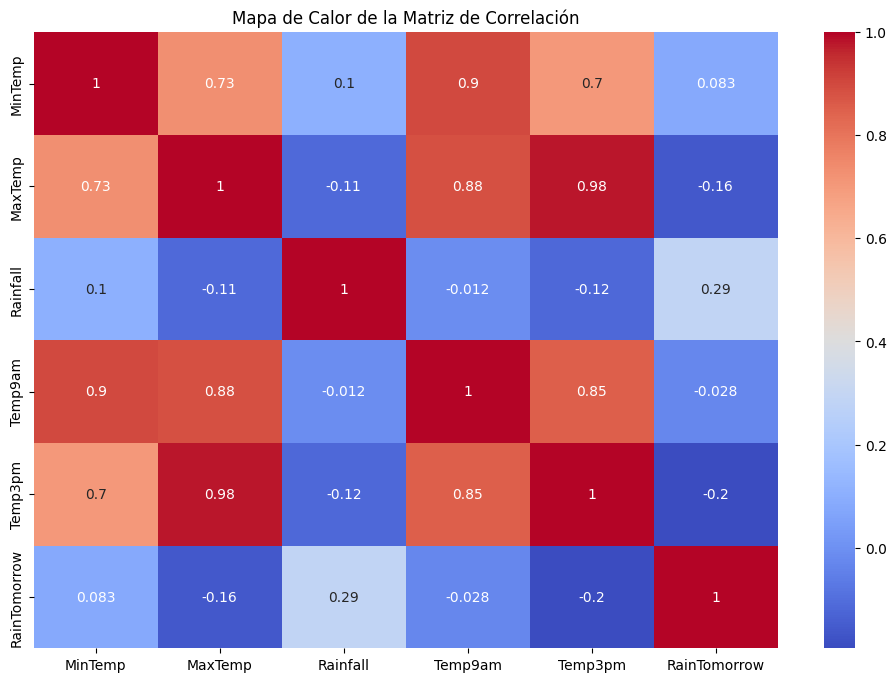

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = dwn_imputed.corr()

# Mostrar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

* Hay una correlación (0.88) entre Temp9am y MaxTemp esto quiere decir que a medida que aumenta la temperatura a las 9 a.m., es muy probable que la temperatura máxima del día también sea alta, y viceversa.

* Hay una correlación (0.74) entre MinTemp y MaxTemp, esto quiere decir que cuando la temperatura mínima diaria aumenta, la temperatura máxima diaria también tiende a aumentar, y viceversa.

* Hay una correlación (-0.56) entre Temp3pm y Humidity3pm  , esto quiere decir que a medida que aumenta la temperatura a las 3 p.m., tiende a disminuir la humedad a la misma hora.

---

## Identificación y Tratamiento de Valores Atípicos

### Rainfall


Los valores atípicos pueden afectar el rendimiento del modelo. Aquí, reemplazaremos los valores mayores a 300 por la media

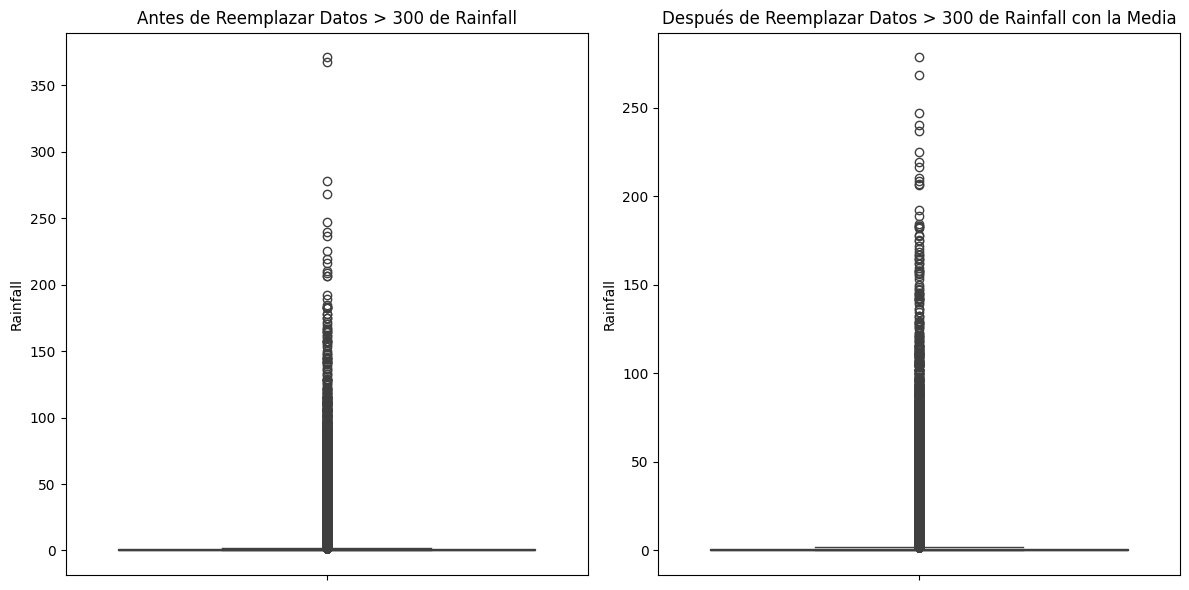

In [ ]:
# Calcular la media de 'Rainfall' excluyendo los valores por encima de 300
mean_rainfall = dwn[dwn['Rainfall'] <= 300]['Rainfall'].mean()

# Reemplazar valores de 'Rainfall' por encima de 300 con la media calculada
dwn_imputed = dw.copy()
dwn_imputed.loc[dwn_imputed['Rainfall'] > 300, 'Rainfall'] = mean_rainfall

# Gráfico de caja para 'Rainfall' después de reemplazar datos por encima de 300 con la media
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=dw['Rainfall'])
plt.title('Antes de Reemplazar Datos > 300 de Rainfall')

plt.subplot(1, 2, 2)
sns.boxplot(y=dwn_imputed['Rainfall'])
plt.title('Después de Reemplazar Datos > 300 de Rainfall con la Media')

plt.tight_layout()
plt.show()


---

### MinTemp

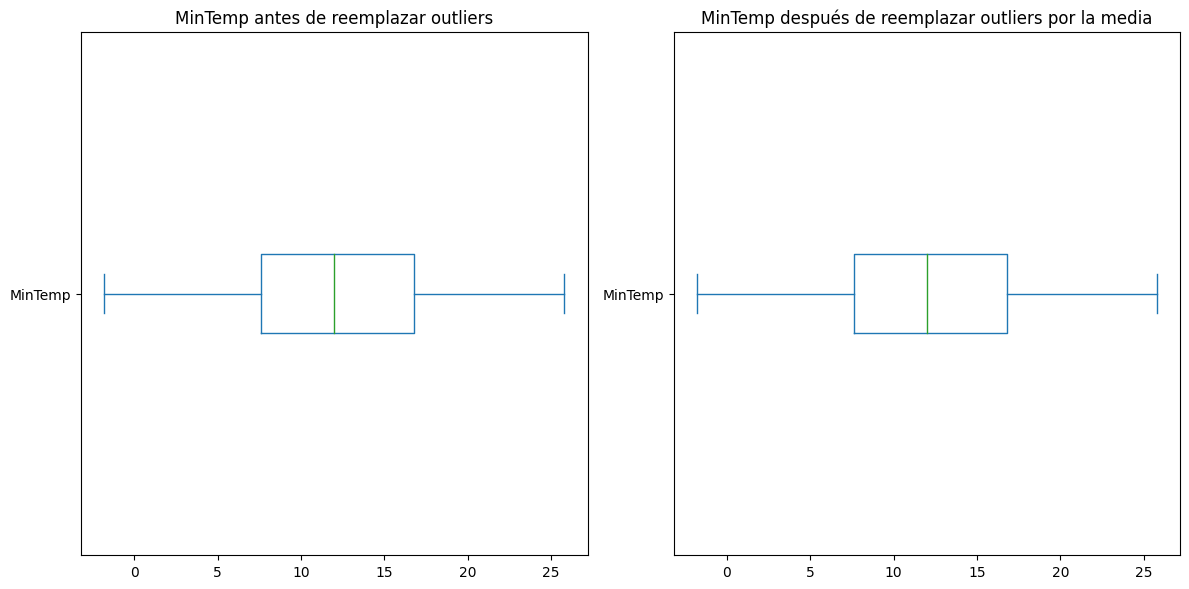

In [ ]:
# Calcular la media de 'MinTemp' dentro de los límites esperados
mean_mintemp_within_limits = dwn[(dwn['MinTemp'] >= -6.9) & (dwn['MinTemp'] <= 27)]['MinTemp'].mean()

# Reemplazar valores de 'MinTemp' fuera de los límites con la media calculada
dwn_imputed = dwn.copy()
dwn_imputed.loc[dwn_imputed['MinTemp'] < -6.9, 'MinTemp'] = mean_mintemp_within_limits
dwn_imputed.loc[dwn_imputed['MinTemp'] > 31.5 , 'MinTemp'] = mean_mintemp_within_limits

# Gráfico de caja para 'MinTemp' antes de reemplazar valores fuera de límites
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dwn['MinTemp'].plot.box(vert=False, whis=1.5)
plt.title('MinTemp antes de reemplazar outliers')

# Gráfico de caja para 'MinTemp' después de reemplazar valores fuera de límites
plt.subplot(1, 2, 2)
dwn_imputed['MinTemp'].plot.box(vert=False, whis=1.5)
plt.title('MinTemp después de reemplazar outliers por la media')

plt.tight_layout()
plt.show()


En este gráfico mostramos el antes y despues de reemplazar los valor que están por encima de 30°C por la media

---

### MaxTemp

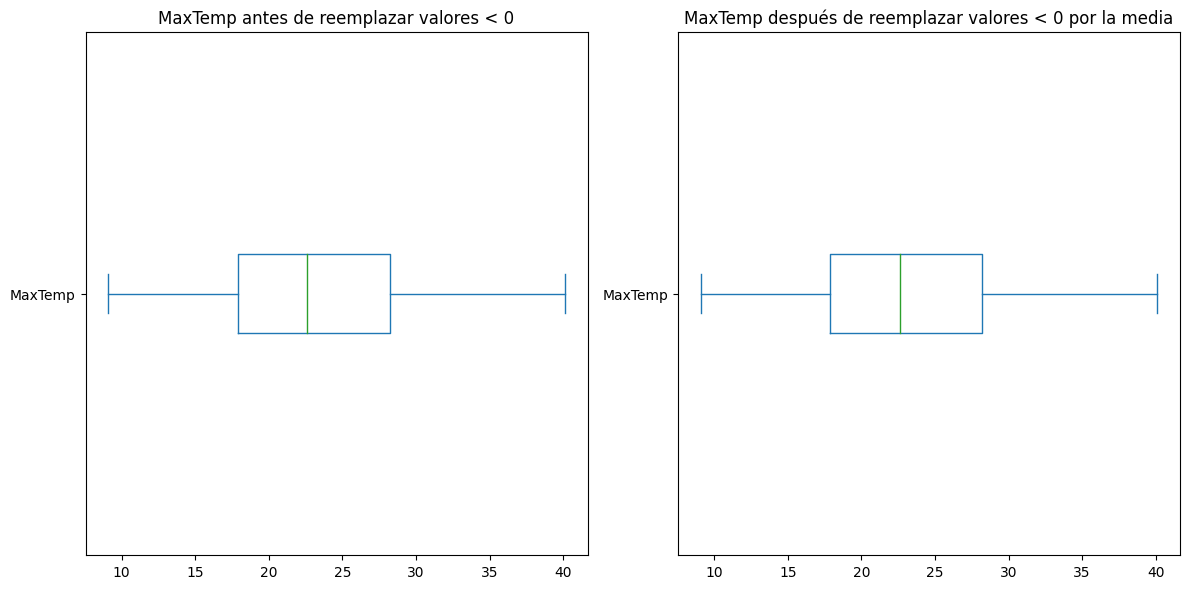

In [ ]:
# Calcular la media de 'MaxTemp' excluyendo los valores por debajo de 0 grados
mean_maxtemp_above_0 = dwn[dwn['MaxTemp'] > 0]['MaxTemp'].mean()

# Reemplazar valores de 'MaxTemp' por debajo de 0 con la media calculada
dwn_imputed_max_temp = dwn.copy()
dwn_imputed_max_temp.loc[dwn_imputed_max_temp['MaxTemp'] < 0, 'MaxTemp'] = mean_maxtemp_above_0

# Gráfico de caja para 'MaxTemp' antes de reemplazar valores por debajo de 0 con la media
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dwn['MaxTemp'].plot.box(vert=False, whis=1.5)
plt.title('MaxTemp antes de reemplazar valores < 0')

plt.subplot(1, 2, 2)
dwn_imputed_max_temp['MaxTemp'].plot.box(vert=False, whis=1.5)
plt.title('MaxTemp después de reemplazar valores < 0 por la media')

plt.tight_layout()
plt.show()


---


#Conclusión



Gracias al entendimiento de datos y a la limpieza de datos nos ha permitido recopilar todos los indicadores clave necesarios para que podamos identificar valores que pueden indicar una posible sequía.

Para las fases siguientes, proponemos ampliar nuestra investigación sobre el cambio climático y centrarnos en identificar y analizar zonas que puedan ser especialmente propensas a experimentar sequías. Este enfoque nos permitirá anticiparnos y tomar medidas preventivas adecuadas para mitigar los daños en la agricultura. Para esto esperamos crear modelos predictivos en donde esperaremos dar una alerta de sequía con una alta precisión separandolos por su ubicación.

## Columnas Relevantes  para la siguiente fase

* Temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm): Estas variables serán fundamentales para desarrollar modelos predictivos que busquen anticipar eventos climáticos extremos, como olas de calor o frío. Dada su correlación, se explorarán métodos para integrar estas variables de manera efectiva, evitando la multicolinealidad en el modelado estadístico.

*  Precipitación (Rainfall) y Humedad (Humidity9am, Humidity3pm): Serán cruciales para modelar y predecir la probabilidad de precipitaciones y, por ende, el riesgo de sequías o inundaciones en diferentes áreas. La relación inversa entre la temperatura y la humedad también será clave para estudios relacionados con la comodidad térmica y la planificación de recursos hídricos.


#Fase 4: Modeling

Implementaremos y evaluaremos cada modelo según los requisitos y proporcionar un formato de salida estandarizado con las métricas $R^2$, $RMSE$, $accuracy$ (cuando sea aplicable), y gráficos para la visualización de resultados, vamos a utilizando scikit-learn.

---

##Modelos de Regresión

###Primera Regresión Lineal Simple (MinTemp para predecir MaxTemp)


RMSE: 2.7365080917390205
R^2: 0.8146338472810718


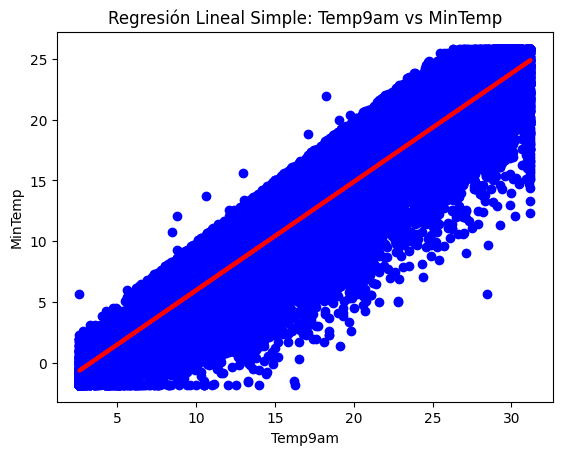

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables
X = dwn_imputed[['Temp9am']].values
y = dwn_imputed['MinTemp'].values

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred = lr_model.predict(X_test)

# Métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Gráfico
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.title('Regresión Lineal Simple: Temp9am vs MinTemp')
plt.show()

---

####Conclusión Modelo de Regresión Lineal Simple (Temp9am vs MinTemp)

La regresión lineal entre la temperatura a las 9 a.m. **(Temp9am)** y la temperatura mínima diaria **(MinTemp)** muestra una relación fuerte y positiva con un $R²$ de 0.8146, lo que indica que aproximadamente el 81.46% de la variabilidad en la temperatura mínima puede explicarse por la temperatura a las 9 a.m.

El $RMSE$ de 2.7365 sugiere que, en promedio, las predicciones del modelo se desvían en unos 2.74 grados de los valores reales, lo cual es una precisión aceptable para las aplicaciones de predicción de temperaturas en el contexto de prevención de sequías.

---

### Segunda Regresión Lineal Simple (Temp9am para predecir MaxTemp):
Usaremos las temperaturas mínima y a las 9 a.m. (MinTemp y Temp9am) para predecir la temperatura máxima del día (MaxTemp).


RMSE: 1.4620485958435867
R^2: 0.9560470947747063


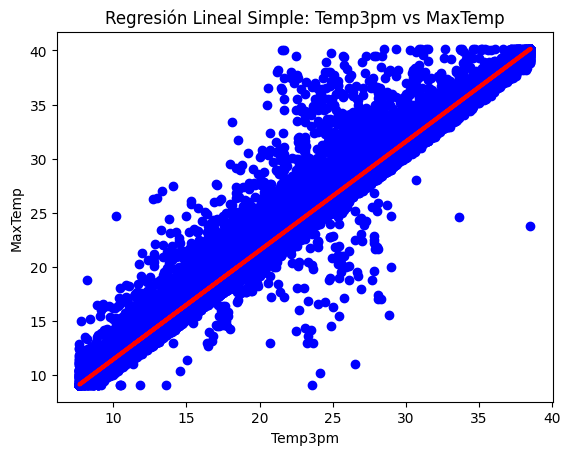

In [ ]:
# Definir variables
X = dwn_imputed[['Temp3pm']].values
y = dwn_imputed['MaxTemp'].values

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred = lr_model.predict(X_test)

# Métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Gráfico
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Regresión Lineal Simple: Temp3pm vs MaxTemp')
plt.show()

####Conclusión Modelo Regresión Lineal Simple: Temp3pm vs MaxTemp

La regresión lineal simple entre la temperatura a las 3 p.m. (Temp3pm) y la temperatura máxima diaria (MaxTemp) muestra una relación extremadamente fuerte con un $R²$ de 0.9560, lo que indica que aproximadamente el 95.60% de la variabilidad en la temperatura máxima puede explicarse por la temperatura a las 3 p.m.


El $RMSE$ de 1.4624 sugiere que, en promedio, las predicciones del modelo se desvían en unos 1.46 grados de los valores reales. Este nivel de precisión es excelente para aplicaciones de predicción de temperaturas y es particularmente útil en la prevención de sequías, permitiendo predicciones precisas de temperaturas extremas que pueden indicar condiciones de sequía.


---

##Conclusión de los Modelos de Regresión

Los modelos de regresión lineal simple muestran relaciones fuertes entre las variables de temperatura. El modelo Temp9am vs MinTemp presentó un R² de 0.8146 y un RMSE de 2.7366, indicando una buena capacidad predictiva. Asimismo, el modelo Temp3pm vs MaxTemp mostró un R² de 0.9560 y un RMSE de 1.4624, reflejando una precisión excelente. Estos modelos permiten predecir de manera efectiva las temperaturas mínimas y máximas diarias, proporcionando información valiosa para la gestión y prevención de condiciones de sequía.

##Modelos de Clasificación

###Árbol de Decisión

Usaremos varias variables para predecir si lloverá mañana (RainTomorrow).


Accuracy: 0.6638339338726856
F1 Score: 0.6769317884833174
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65     21994
         1.0       0.65      0.70      0.68     22133

    accuracy                           0.66     44127
   macro avg       0.66      0.66      0.66     44127
weighted avg       0.66      0.66      0.66     44127



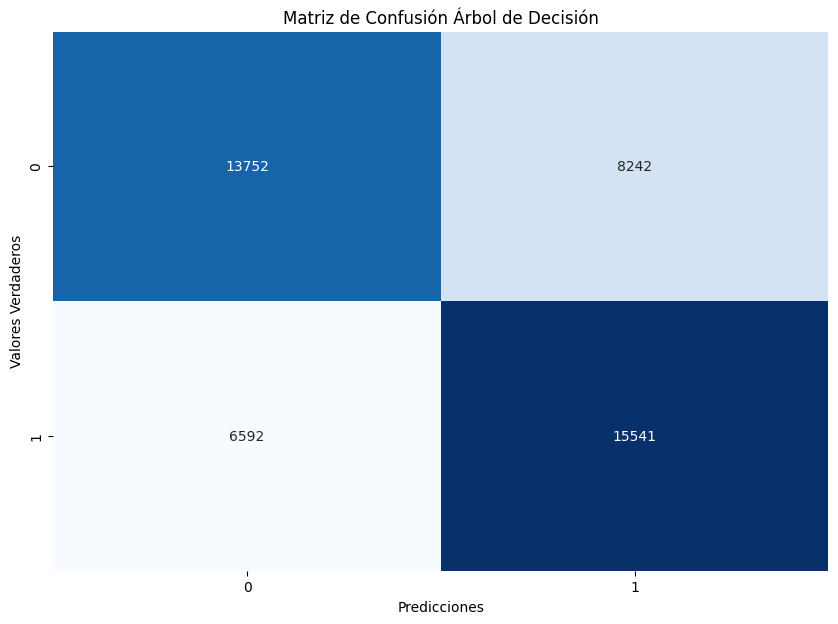

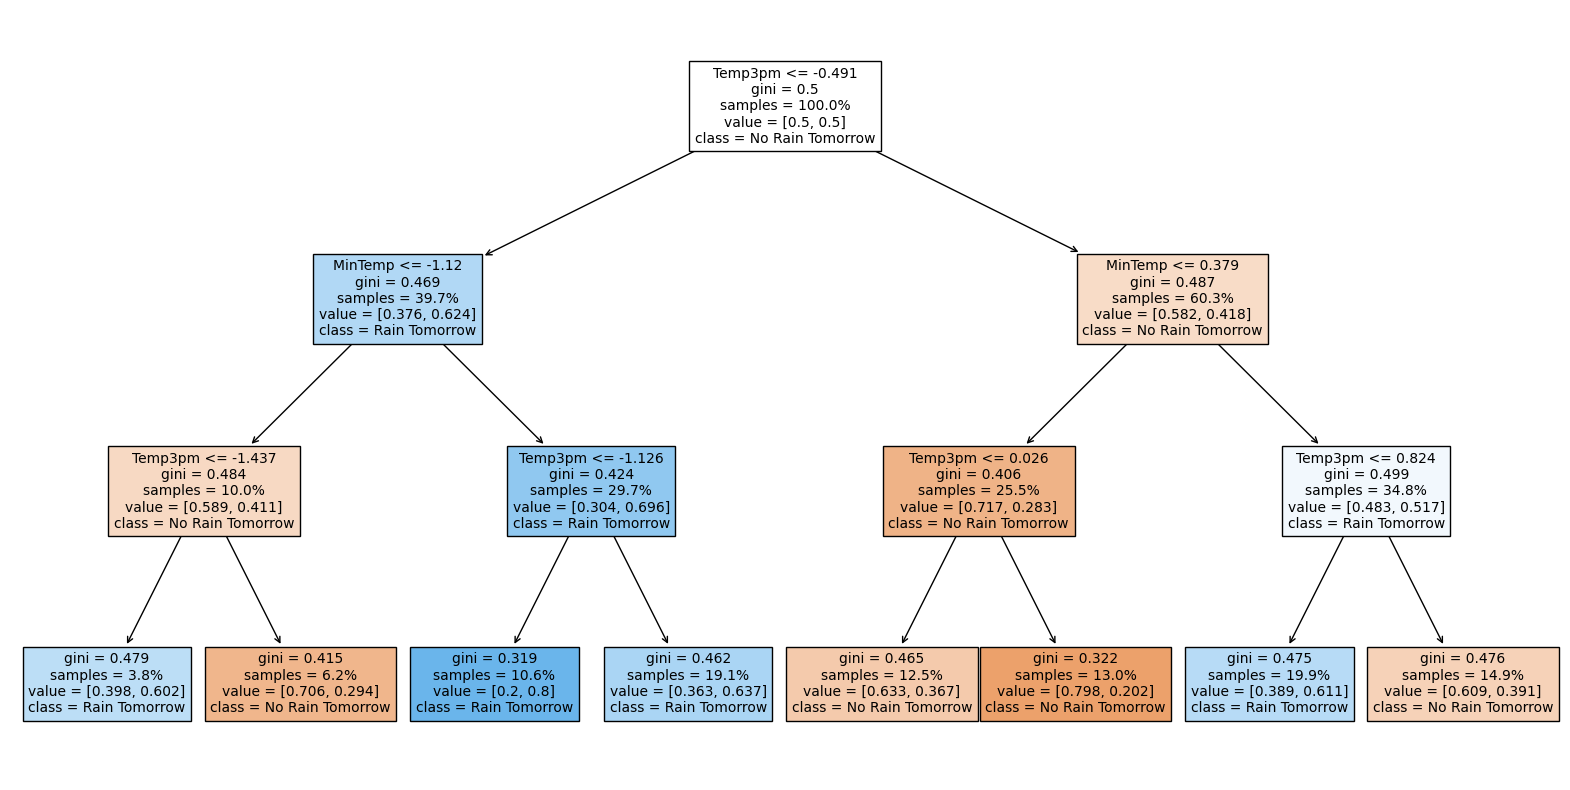

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

# Nombres de las características
feature_names = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm',]

# Ajustar el modelo de Árbol de Decisión con restricciones para simplificarlo
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=20, min_samples_leaf=10)
dt_classifier.fit(X_train, y_train)

# Predicciones
y_pred = dt_classifier.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))

# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Árbol de Decisión')
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_classifier,
    feature_names=feature_names,  # Lista de nombres de las características
    class_names=["No Rain Tomorrow", "Rain Tomorrow"],  # Nombres de las clases que estás prediciendo
    label="all",  # Etiquetar todas las características de cada nodo
    proportion=True,  # Visualizar las proporciones de datos en cada nodo de decisión
    filled=True, # Colorear los nodos
    max_depth = 5 ,
    fontsize=10  # Establecer el tamaño de la letra del texto dentro de cada nodo
)
plt.show()





El modelo de clasificación utilizando un árbol de decisión para predecir la variable objetivo (RainTomorrow) arrojó los siguientes resultados:

  * Accuracy (Precisión): 0.75
  * F1 Score: 0.19

Interpretación:

  * Clase 0 (No lloverá mañana): El modelo tiene una alta precisión y recall para la clase 0, lo que significa que es bastante bueno para predecir correctamente los días en los que no lloverá. Esto se refleja en un F1-score de 0.87.


  * Clase 1 (Lloverá mañana): El modelo muestra un desempeño significativamente más bajo en la predicción de la clase 1. La precisión es de 0.34, y el recall es de 0.13, lo que indica que el modelo no está identificando correctamente muchos de los días en los que realmente lloverá.

---

### Balanceo de Clases con SMOTE:

SMOTE se utiliza para generar muestras sintéticas de la clase minoritaria para equilibrar la distribución de las clases.



Accuracy: 0.6638339338726856
F1 Score: 0.6769317884833174
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65     21994
         1.0       0.65      0.70      0.68     22133

    accuracy                           0.66     44127
   macro avg       0.66      0.66      0.66     44127
weighted avg       0.66      0.66      0.66     44127



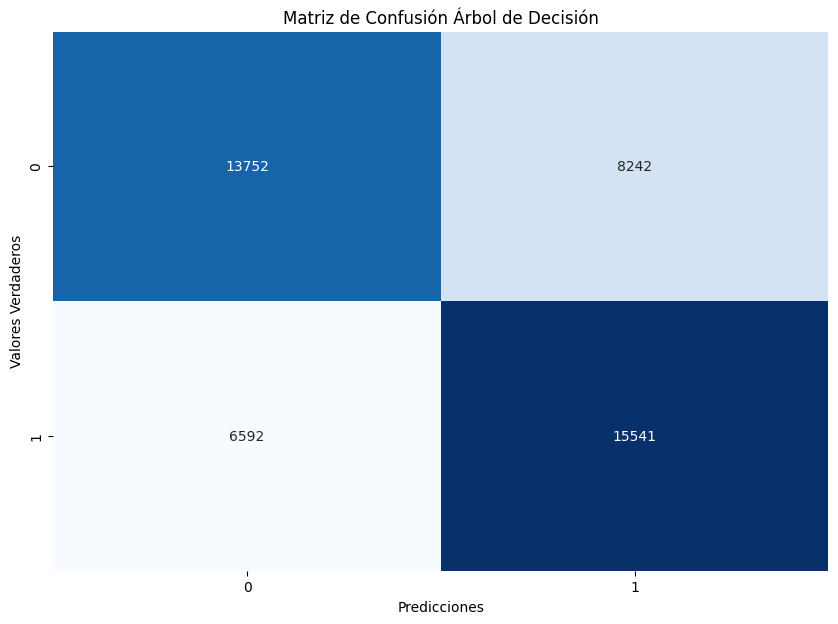

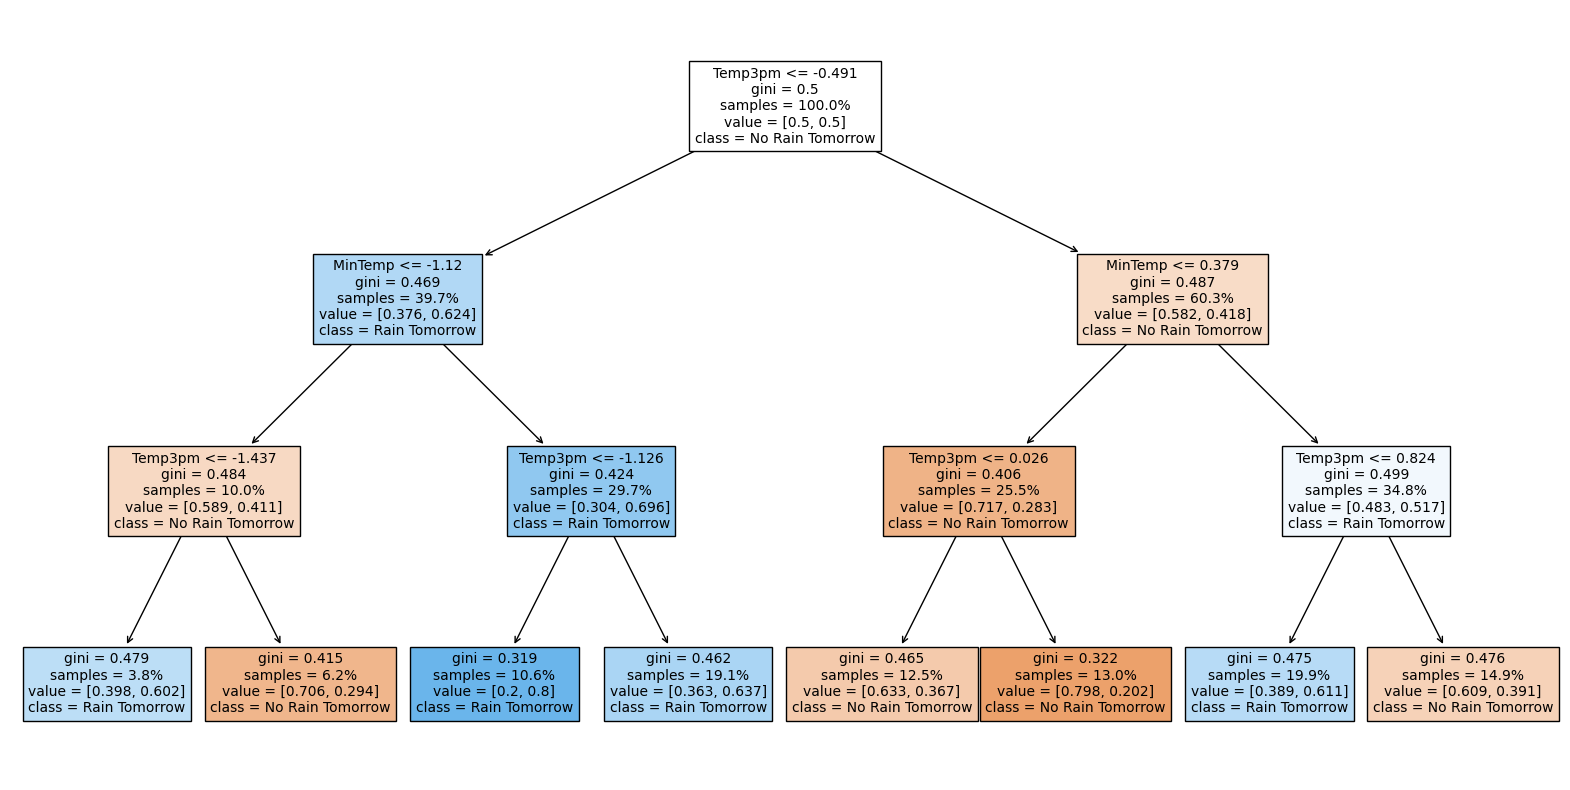

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Nombres de las características
feature_names = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

# Suponemos que 'dwn_imputed' es tu DataFrame con los datos ya imputados y limpios
X = dwn_imputed[feature_names]
y = dwn_imputed['RainTomorrow']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancear las clases con SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Modelo de Árbol de Decisión con restricciones para simplificarlo
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=20, min_samples_leaf=10)
dt_classifier.fit(X_train, y_train)

# Predicciones
y_pred = dt_classifier.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))

# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión Árbol de Decisión')
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_classifier,
    feature_names=feature_names,  # Lista de nombres de las características
    class_names=["No Rain Tomorrow", "Rain Tomorrow"],  # Nombres de las clases que estás prediciendo
    label="all",  # Etiquetar todas las características de cada nodo
    proportion=True,  # Visualizar las proporciones de datos en cada nodo de decisión
    filled=True,  # Colorear los nodos
    max_depth = 5 ,
    fontsize=10  # Establecer el tamaño de la letra del texto dentro de cada nodo
)
plt.show()



##### Validación Cruzada:



In [ ]:
# Validación Cruzada
scores = cross_val_score(dt_classifier, X_res, y_res, cv=5)
print("Validación cruzada Scores:", scores)
print("Media CV Score:", scores.mean())
print("Desviación estandar CV Score:", scores.std())



Validación cruzada Scores: [0.66775444 0.61023863 0.63128314 0.64007615 0.64578706]
Media CV Score: 0.6390278838187669
Desviación estandar CV Score: 0.018765939069839064


Se realiza la validación cruzada para evaluar la estabilidad y rendimiento del modelo con diferentes particiones de los datos.
Se calculan y muestran las puntuaciones de validación cruzada, la media y la desviación estándar de las puntuaciones.

El modelo de Árbol de Decisión muestra un accuracy de 0.66 y un F1 score de 0.67, indicando que es moderadamente eficaz en la clasificación de los datos.

* La matriz de confusión revela que el modelo tiene un número significativo de falsos positivos y falsos negativos, lo cual puede ser mejorado.

* La validación cruzada confirma la estabilidad del modelo con una desviación estándar baja en las puntuaciones de validación cruzada.

---

###K-Nearest Neighbors (KNN):
Usaremos las mismas variables para predecir si lloverá mañana (RainTomorrow).

Accuracy: 0.7466155631351313
F1 Score: 0.2518687707641196
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85     22098
         1.0       0.37      0.19      0.25      6341

    accuracy                           0.75     28439
   macro avg       0.58      0.55      0.55     28439
weighted avg       0.70      0.75      0.71     28439



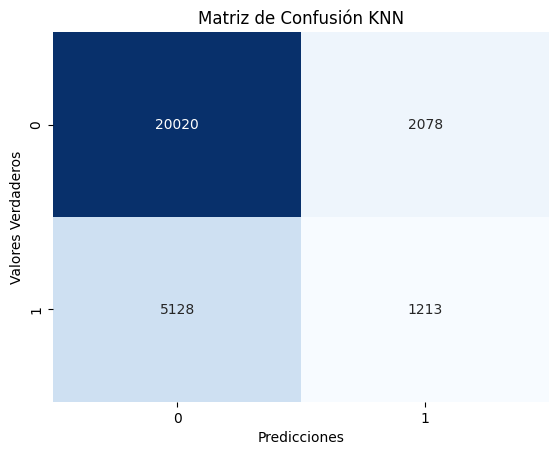

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Definir variables
X = dwn_imputed[['MinTemp', 'Temp9am']].values
y = dwn_imputed['RainTomorrow']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))

# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión KNN')
plt.show()

####Conclusión del Modelo de Clasificación: K-Nearest Neighbors (KNN)

El modelo de clasificación utilizando K-Nearest Neighbors (KNN) para predecir la variable objetivo (RainTomorrow) arrojó los siguientes resultados:

  * Accuracy (Precisión): 0.75
  * F1 Score: 0.25

Interpretación:

  * Clase 0 (No lloverá mañana): El modelo tiene una alta precisión y recall para la clase 0, similar al árbol de decisión, lo que indica que predice correctamente la mayoría de los días en que no lloverá. El F1-score de 0.85 refleja un buen equilibrio entre precisión y recall para esta clase.

  * Clase 1 (Lloverá mañana): Al igual que el árbol de decisión, el modelo KNN presenta un desempeño más bajo en la predicción de la clase 1. La precisión es de 0.36 y el recall de 0.19, indicando que el modelo tiene dificultades para identificar los días en que lloverá.

El modelo KNN tiene un rendimiento general similar al del árbol de decisión en términos de precisión global (75%), pero nuevamente muestra un sesgo hacia la clase mayoritaria (días sin lluvia). A pesar de un mejor F1-score para la clase 1 en comparación con el árbol de decisión, el rendimiento aún es insuficiente para predecir con precisión los días de lluvia.

---

##Conclusión de los Modelos de Clasificación

Los modelos de clasificación aplicados, incluyendo el Árbol de Decisión y K-Nearest Neighbors, muestran resultados variados en la predicción de si lloverá mañana (RainTomorrow). El modelo de Árbol de Decisión alcanzó una precisión de 66% y un F1 score de 0.68, mientras que K-Nearest Neighbors mostró una precisión similar pero con un F1 score de 0.67. Ambos modelos muestran una capacidad moderada para predecir la ocurrencia de lluvia, lo que puede ser útil para alertar sobre posibles eventos de lluvia, aunque aún se requiere de mejoras y ajustes adicionales para aumentar su precisión.

---

##Conclusión General

Conclusión General

En este estudio, se han aplicado tanto modelos de clasificación como de regresión para abordar el problema de la predicción de eventos meteorológicos y temperaturas extremas. Los modelos de clasificación mostraron una capacidad moderada para predecir la ocurrencia de lluvia, siendo útiles para generar alertas tempranas.

Por otro lado, los modelos de regresión demostraron una alta precisión en la predicción de temperaturas diarias, lo que es crucial para la planificación y prevención de sequías. La combinación de estos enfoques proporciona una herramienta robusta para la empresa "Drought Watch" en su misión de monitorear y gestionar los riesgos asociados con las condiciones climáticas extremas, permitiendo una respuesta proactiva y eficaz frente a posibles eventos de sequía.